In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
import pandas as pd

In [2]:
def bin_ent(x) : 
    return -x * np.log2(x+1e-6) - (1-x)*np.log2(1-x+1e-6)

def GDR(R) : 
    return 2 ** (-2*R)

def MMSE_BPSK(snr) :    
    def BPSK_int(x,snr) :
        return np.exp(-x**2/2) / np.sqrt(2*np.pi) * np.tanh(snr - np.sqrt(snr) * x)
    integral = quad(lambda x: BPSK_int(x,snr), -10,10)[0]
    return 1- integral

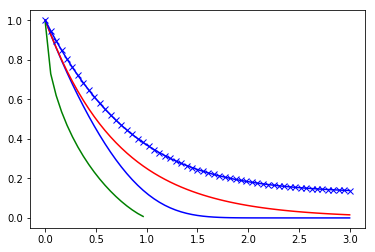

In [142]:
RR = np.linspace(0.0001,3,57)
DD = np.linspace(0,1,1121)

D_SS = []
D_G = []
D_AWGN = []

for i,R in enumerate(RR) :
    D_SS += [MMSE_BPSK(2** (2*R)-1)]
    
    gm = 3
    eta = (1-2**(-2*R)) / (1 + gm * 2 ** (-2*R))
    
    D_AWGN += [MMSE_BPSK(eta * gm)]
    D_G += [GDR(R)]
    
R_opt = 1 - bin_ent(DD/2)

from scipy.interpolate import interp1d
D_opt = interp1d(R_opt, DD, bounds_error=False)(RR)

plt.plot(RR,D_SS,'b')
plt.plot(RR,D_G,'r')
plt.plot(RR,D_opt,'g')
plt.plot(RR,D_AWGN,'-xb')
plt.show()


In [139]:
res = pd.DataFrame({'R' : RR, 'SS' : D_SS, 'G' : D_G, 'opt' : D_opt, 'AWGN' : D_AWGN} )


In [140]:
res.to_csv('../PlotData/BPSK.csv')